In [1]:
import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools    


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
path = "tutorial/"
train_data_path = path+"train"
test_data_path = path+"test"
valid_data_path = path+"valid"

In [3]:
img_rows = 224
img_cols = 224
batch_size = 10


In [38]:
#Image Generator
#Image Generator
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 323 images belonging to 11 classes.
Found 385 images belonging to 11 classes.
Found 596 images belonging to 11 classes.


In [39]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     print(cols, rows)
    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [40]:
imgs, labels = next(train_generator)
# print(labels)

{'Black': 0, 'Blue': 1, 'Brown': 2, 'Cyan': 3, 'Gray': 4, 'Green': 5, 'Orange': 6, 'Purple': 7, 'Red': 8, 'White': 9, 'Yellow': 10}


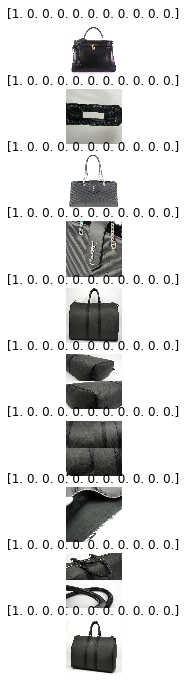

In [41]:
print(train_generator.class_indices)
plots(imgs, titles=labels)

In [42]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(img_rows, img_cols, 3)), 
                    Flatten(), 
                    Dense(11, activation='softmax')
                   ])


In [43]:
# model.compile(Adam(lr=.0001), loss='categorical_crossentropy')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [44]:
model.fit_generator(train_generator, steps_per_epoch=10, validation_data=valid_generator, validation_steps=4, epochs=5)

Epoch 1/5
10/10 [==============================] - 6s 551ms/step - loss: 29958.0683 - accuracy: 0.0900 - val_loss: 18091.5859 - val_accuracy: 0.0000e+00
Epoch 2/5
10/10 [==============================] - 6s 599ms/step - loss: 29487.0523 - accuracy: 0.0000e+00 - val_loss: 10580.3350 - val_accuracy: 0.2250
Epoch 3/5
10/10 [==============================] - 6s 564ms/step - loss: 7455.6592 - accuracy: 0.3300 - val_loss: 986.0613 - val_accuracy: 0.2000
Epoch 4/5
10/10 [==============================] - 5s 495ms/step - loss: 666.4172 - accuracy: 0.1700 - val_loss: 1100.1724 - val_accuracy: 0.2000
Epoch 5/5
10/10 [==============================] - 6s 576ms/step - loss: 639.7989 - accuracy: 0.4300 - val_loss: 463.7877 - val_accuracy: 0.2500


In [45]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)                17347979  
Total params: 17,348,875
Trainable params: 17,348,875
Non-trainable params: 0
_________________________________________________________________


In [46]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)



Confusion Matrix
Confusion matrix, without normalization


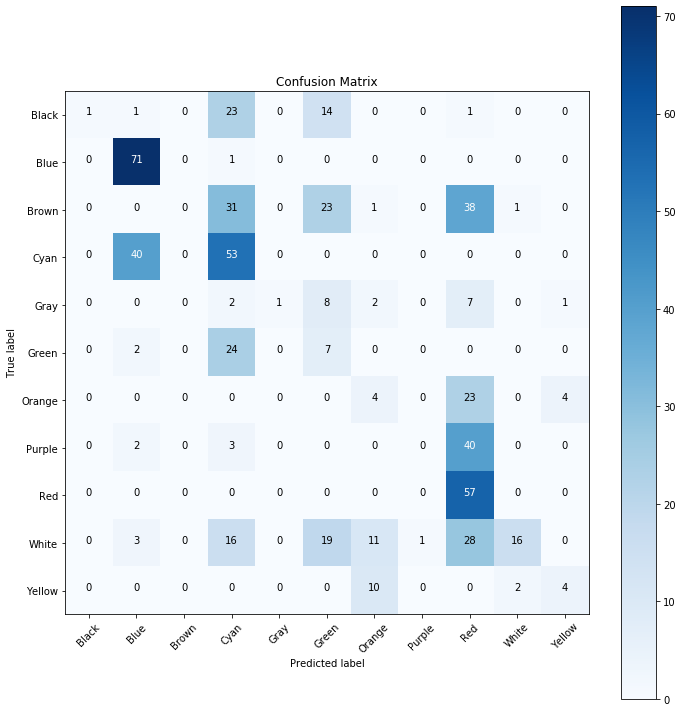

In [48]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [51]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Black       1.00      0.03      0.05        40
        Blue       0.60      0.99      0.74        72
       Brown       0.00      0.00      0.00        94
        Cyan       0.35      0.57      0.43        93
        Gray       1.00      0.05      0.09        21
       Green       0.10      0.21      0.13        33
      Orange       0.14      0.13      0.14        31
      Purple       0.00      0.00      0.00        45
         Red       0.29      1.00      0.45        57
       White       0.84      0.17      0.28        94
      Yellow       0.44      0.25      0.32        16

    accuracy                           0.36       596
   macro avg       0.43      0.31      0.24       596
weighted avg       0.41      0.36      0.27       596



In [52]:
test_score = model.evaluate_generator(test_generator, batch_size)
# print(test_score)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: {:.2f}%".format(test_score[0] * 100))

[INFO] accuracy: 60.00%
[INFO] Loss: 0.00%


In [53]:
import keras
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [54]:
type(vgg16_model)


keras.engine.training.Model

In [55]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [56]:
model.layers.pop()


In [57]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [59]:
model.fit_generator(train_generator, steps_per_epoch=10, validation_data=valid_generator, validation_steps=4, epochs=5)

Epoch 1/5
10/10 [==============================] - 41s 4s/step - loss: 2.3929 - accuracy: 0.1100 - val_loss: 2.4042 - val_accuracy: 0.0750
Epoch 2/5
10/10 [==============================] - 44s 4s/step - loss: 2.3941 - accuracy: 0.0700 - val_loss: 2.4073 - val_accuracy: 0.2250
Epoch 3/5
10/10 [==============================] - 43s 4s/step - loss: 2.4013 - accuracy: 0.1183 - val_loss: 2.3903 - val_accuracy: 0.1000
Epoch 4/5
10/10 [==============================] - 44s 4s/step - loss: 2.3967 - accuracy: 0.0800 - val_loss: 2.3981 - val_accuracy: 0.1250
Epoch 5/5
10/10 [==============================] - 37s 4s/step - loss: 2.3908 - accuracy: 0.1398 - val_loss: 2.3888 - val_accuracy: 0.2000
